In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  glob
import seaborn as sns

tocategory = lambda col: pd.Categorical(col)
underscoretospace = lambda x: x.replace("_", " ") if type(x) is str else x
def q5(x): return x.quantile(.05)
def q95(x): return x.quantile(.95)

In [2]:
filenames = glob.glob("data/lsb.*.r*")
params = ["Algorithm", "Max threads", "Graph nodes"];

In [3]:
def get_df(filename):
    return (pd
      .read_csv(filename, sep=" ", comment="#", skipinitialspace=True, index_col="id")
      .applymap(underscoretospace)
      .dropna("columns", "all")
    )
df = pd.concat(get_df(filename) for filename in filenames)
df[["Algorithm", "Graph_name"]] = df[["Algorithm", "Graph_name"]].apply(tocategory)
df.columns = df.columns.map(underscoretospace)

In [4]:
df.head(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
0,Sollin,100,Erdos-Renyi random,1,0,9791.586182,0
1,Sollin,100,Erdos-Renyi random,1,1,4089.327637,0
2,Sollin,100,Erdos-Renyi random,1,2,4031.069092,0
3,Sollin,100,Erdos-Renyi random,1,3,3734.379883,0
4,Sollin,100,Erdos-Renyi random,1,4,3144.047852,0


In [5]:
df.tail(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
175,parallel sollin AL,10000,Erdos-Renyi random,32,5,807374.550293,2
176,parallel sollin AL,10000,Erdos-Renyi random,32,6,785651.695312,3
177,parallel sollin AL,10000,Erdos-Renyi random,32,7,774162.042480,3
178,parallel sollin AL,10000,Erdos-Renyi random,32,8,781969.264648,0
179,parallel sollin AL,10000,Erdos-Renyi random,32,9,770857.857178,2


In [6]:
timequantiles = df.groupby(params).agg([q5, q95])["time"]
df_timequantiles =  timequantiles.loc[map(tuple, df[params].values)]

In [7]:
summary = (df[params + ["time"]]
    [(df.time >= df_timequantiles["q5"].values) & (df.time <= df_timequantiles["q95"].values)]
    .groupby(params).agg(["median", "mean", "min", "max", "std"])
)

In [8]:
summary

time                 \
                                                   median           mean   
Algorithm          Max threads Graph nodes                                 
Sollin             1           100            3140.519288    3439.653870   
                               1000          54298.918579   54345.486267   
                               10000        979084.736450  981005.165832   
parallel sollin AL 1           100            2822.708252    3364.820421   
                               1000          38926.202149   39391.633165   
                               10000        639650.445800  644978.784180   
                   2           100            4404.294678    4667.509833   
                               1000          44899.913208   41095.490763   
                               10000        576350.767700  573602.044569   
                   4           100            3783.989991    4175.715196   
                               1000          42950.624267   43286.276259   
                               10000        550134.438354  548383.904365   
                   8           100            4283.438476    4376.965929   
                               1000          44407.382691   44608.357612   
                               10000        553392.654053  549583.130331   
                   16          100            6251.764893    5972.479221   
                               1000          49052.998291   49082.538968   
                               10000        599806.785400  599986.050998   
                   32          100            7724.746826    7668.149712   
                               1000          65612.343506   65428.091675   
                               10000        773884.468262  776486.057482   

                                                                          \
                                                      min            max   
Algorithm          Max threads Graph nodes                                 
Sollin             1           100            3124.541016    4089.327637   
                               1000          54184.132080   54730.187744   
                               10000        971033.936035  994470.189697   
parallel sollin AL 1           100            2645.892090    7725.012207   
                               1000          38387.921143   42556.342041   
                               10000        619768.854492  689522.120117   
                   2           100            4030.865479    6511.822021   
                               1000          31185.206055   55233.369873   
                               10000        518136.320312  632542.453613   
                   4           100            3549.777588    5738.372803   
                               1000          41808.456299   48875.519287   
                               10000        512597.491455  576648.789307   
                   8           100            3838.541748    5326.428223   
                               1000          43841.754639   47652.312012   
                               10000        507219.969727  582965.552490   
                   16          100            4363.488037    7020.786621   
                               1000          47459.874268   50957.481934   
                               10000        560291.047363  642528.690186   
                   32          100            7223.393311    8344.153320   
                               1000          61857.083740   71946.410156   
                               10000        749497.716553  819422.714600   

                                                          
                                                     std  
Algorithm          Max threads Graph nodes                
Sollin             1           100            436.010670  
                               1000           175.426109  
                               10000         9269.109992  
parallel sollin AL 1           100           1312

In [9]:
g_idx = ["Graph nodes", "Graph name"]
graphs = df[g_idx].drop_duplicates().values

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


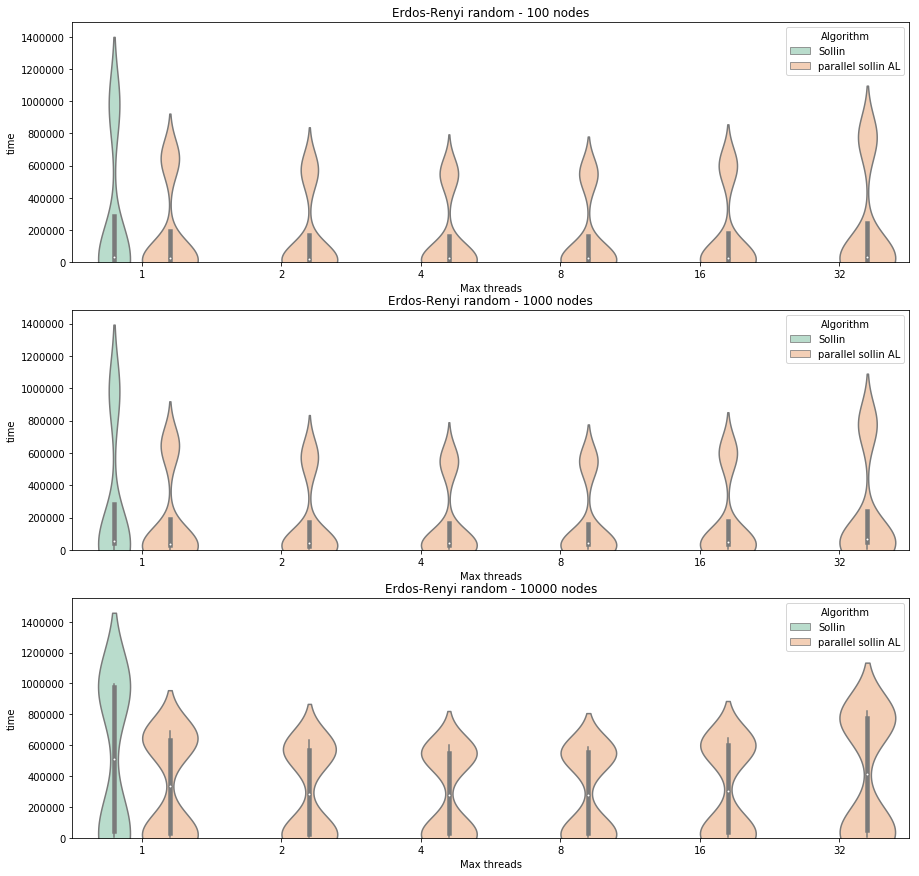

In [10]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.violinplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel2", ax=ax[i]
    )
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
    ax[i].set_ylim(0,)

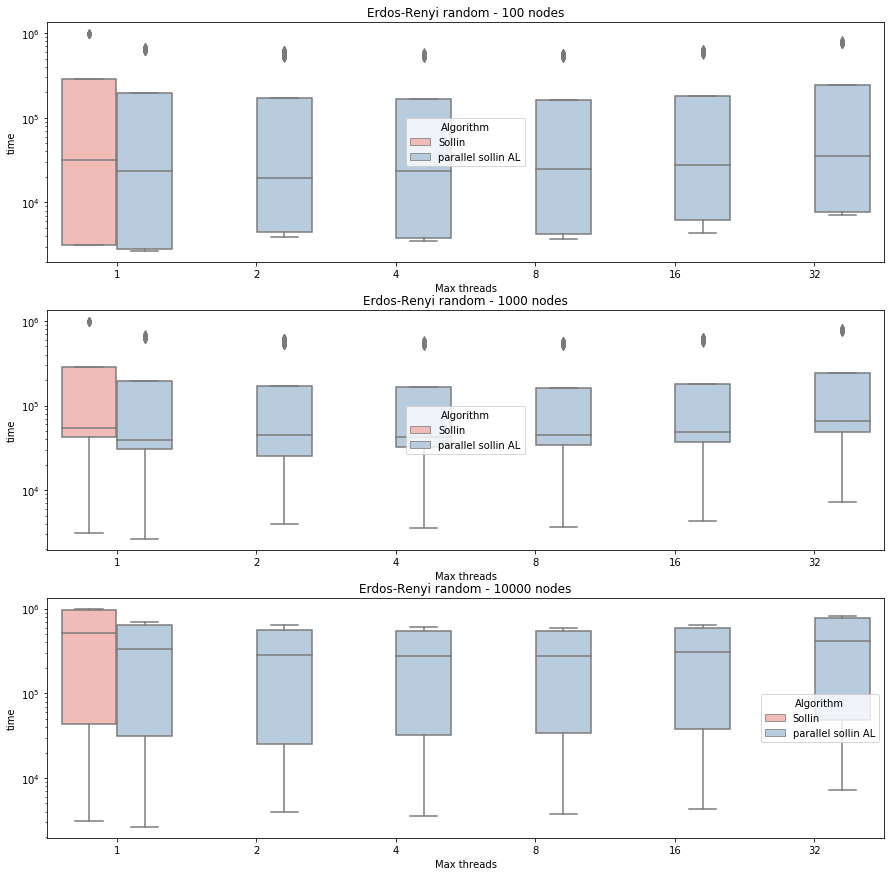

In [11]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.boxplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel1", ax=ax[i]
    ).set(yscale="log")
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")